In [1]:
import tensorflow as tf
import sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import scipy
from scipy import ndimage
import PIL

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [5]:


# Define data directories
train_dir = '/content/drive/MyDrive/DataSet/train'
test_dir = '/content/drive/MyDrive/DataSet/test'
val_dir = '/content/drive/MyDrive/DataSet/val'



In [6]:
img_width, img_height = 224, 224
batch_size = 10

In [7]:
# Create data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5222 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [8]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

29084464/29084464 [==============================] - 0s 0us/step


In [12]:


# Add custom top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [11]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model


epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs)

Epoch 1/10
522/522 [==============================] - 1509s 3s/step - loss: 0.1675 - accuracy: 0.9338 - val_loss: 0.8559 - val_accuracy: 0.7000
Epoch 2/10
522/522 [==============================] - 145s 278ms/step - loss: 0.1058 - accuracy: 0.9578 - val_loss: 1.6023 - val_accuracy: 0.6000
Epoch 3/10
522/522 [==============================] - 148s 284ms/step - loss: 0.0869 - accuracy: 0.9666 - val_loss: 1.5461 - val_accuracy: 0.7000
Epoch 4/10
522/522 [==============================] - 145s 278ms/step - loss: 0.0729 - accuracy: 0.9747 - val_loss: 0.0931 - val_accuracy: 0.9000
Epoch 5/10
522/522 [==============================] - 146s 279ms/step - loss: 0.0609 - accuracy: 0.9793 - val_loss: 0.0936 - val_accuracy: 0.9000
Epoch 6/10
522/522 [==============================] - 145s 277ms/step - loss: 0.0596 - accuracy: 0.9783 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 7/10
522/522 [==============================] - 146s 280ms/step - loss: 0.0542 - accuracy: 0.9799 - val_loss: 0.0127 - v

In [15]:
import matplotlib.pyplot as plt
def plot_history(history, yrange):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)

    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')

    plt.show()

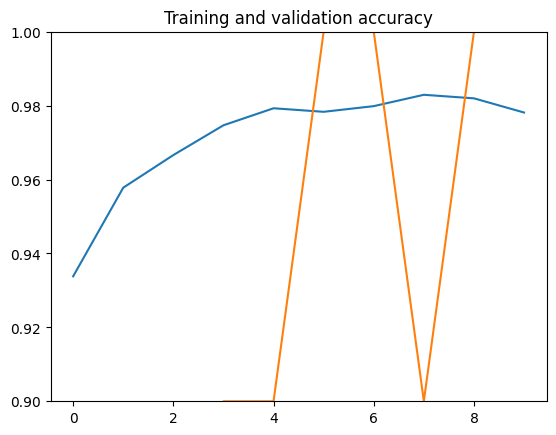

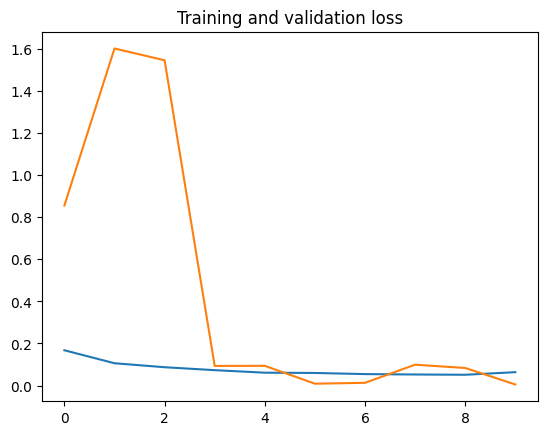

In [16]:
plot_history(history, yrange=(0.9,1))

In [17]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # Set class_mode to 'binary' for binary classification
)

Found 624 images belonging to 2 classes.


In [18]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

63/63 [==============================] - 100s 2s/step - loss: 0.2450 - accuracy: 0.9423
Test Loss: 0.2450118362903595, Test Accuracy: 0.942307710647583
